# Oops... Nothing Here..  So, you are on your own this time.

# Data 

In [0]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=5b6dc34c9bab4bdc098268e9dd43c87df50b5981781efb06a0a036377779f4a2
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
wget.download("https://github.com/MIE451-1513-2019/course-datasets/raw/master/reviews.zip")
!unzip reviews.zip

Archive:  reviews.zip
replace reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
def submission():
    """remove this function before submission
    """
    assert False, "I didn't submit assignment on time!"

In [0]:
submission()

#Imports

In [0]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk
import string

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Read Data

In [0]:
hotelDf = pd.read_csv('reviews.csv')

In [0]:
# Add column title to each column
hotelDf.columns=['filePath','hotelName','reviewColumn','ratingScore','groundTruth']

In [0]:
# Check the number of missing values
hotelDf.isnull().sum()

filePath        0
hotelName       0
reviewColumn    0
ratingScore     0
groundTruth     0
dtype: int64

In [0]:
# Check number of hotels and other important imofrmation
hotelDf.groupby('hotelName').count()

,filePath,reviewColumn,ratingScore,groundTruth
hotelName,,,,
172 Ballantyne B &amp; B,9,9,9,9
"A B&amp;B on Bay, Acrylic Dreams",52,52,52,52
A Garden Stroll B&amp;B,17,17,17,17
A Night at Rosehurst,37,37,37,37
A Patch of Heaven Bed and Breakfast,12,12,12,12
...,...,...,...,...
Westmount Motel,10,10,10,10
Whispering Pines of Stratford,25,25,25,25
Windsor Hotel,107,107,107,107


In [0]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,data/ca/181736/182000/206859191.html,Courtyard Waterloo St. Jacobs,"""Situated right beside the St Jacob's theatre,...",5,positive
1,data/ca/181736/182000/318616131.html,Courtyard Waterloo St. Jacobs,"""My family and I arrived recently on a Friday ...",4,positive
2,data/ca/181736/182000/691359341.html,Courtyard Waterloo St. Jacobs,"""The staff at the front desk were lovely (WHEN...",2,negative
3,data/ca/181736/182000/356425412.html,Courtyard Waterloo St. Jacobs,"""The manager of the housekeeping was very rude...",1,negative
4,data/ca/181736/182000/153795869.html,Courtyard Waterloo St. Jacobs,"""The hotel is wonderfully clean, staff is very...",3,negative


# Q1. Sentiment Analysis and Aggregation

## (a) Compute average Vader sentiment and average ground truth rating per hotel.

In [0]:
# Copied and modiefed fro lab mateiral
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [0]:
# Copied and modifed from lab material
reviews = hotelDf['reviewColumn'].values

In [0]:
# Copied and modifed from lab material
reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

100%|██████████| 5598/5598 [00:06<00:00, 830.35it/s]


In [0]:
# Copied and modifed from lab material
reviewDF.head()

,reviewCol,vader
0,"""Situated right beside the St Jacob's theatre,...",0.5106
1,"""My family and I arrived recently on a Friday ...",0.9108
2,"""The staff at the front desk were lovely (WHEN...",0.5647
3,"""The manager of the housekeeping was very rude...",-0.4754
4,"""The hotel is wonderfully clean, staff is very...",0.9961


In [0]:
# Calcuate vader score for each review
vader_score = []
for review in hotelDf['reviewColumn']:
  vader_score.append(SentimentIntensityAnalyzer().polarity_scores(review)['compound']) # extract the compound

In [0]:
hotelDf['vader'] = vader_score

In [0]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,data/ca/181736/182000/206859191.html,Courtyard Waterloo St. Jacobs,"""Situated right beside the St Jacob's theatre,...",5,positive,0.5106
1,data/ca/181736/182000/318616131.html,Courtyard Waterloo St. Jacobs,"""My family and I arrived recently on a Friday ...",4,positive,0.9108
2,data/ca/181736/182000/691359341.html,Courtyard Waterloo St. Jacobs,"""The staff at the front desk were lovely (WHEN...",2,negative,0.5647
3,data/ca/181736/182000/356425412.html,Courtyard Waterloo St. Jacobs,"""The manager of the housekeeping was very rude...",1,negative,-0.4754
4,data/ca/181736/182000/153795869.html,Courtyard Waterloo St. Jacobs,"""The hotel is wonderfully clean, staff is very...",3,negative,0.9961


In [0]:
# Average ground truth rating per hotel
hotel_AVGrating = hotelDf.groupby('hotelName')['ratingScore'].mean().reset_index()
hotel_AVGrating

,hotelName,ratingScore
0,172 Ballantyne B &amp; B,4.888889
1,"A B&amp;B on Bay, Acrylic Dreams",4.884615
2,A Garden Stroll B&amp;B,4.529412
3,A Night at Rosehurst,4.945946
4,A Patch of Heaven Bed and Breakfast,4.916667
...,...,...
71,Westmount Motel,3.400000
72,Whispering Pines of Stratford,4.960000
73,Windsor Hotel,2.710280
74,Woodmont Guest House,4.933333


##(b) Rank hotels by 
(i) Average Ground Truth Sentiment 
(ii) Average Vader Compound Sentiment Score
Show both top-5 and bottom-5 for both ranking methods. Do they agree or are there inter- esting differences?

### (i) Rank hotels by average ground truth sentiment

In [0]:
# (i) By average ground truth sentiment
# Top 5 rankings
hotel_AVGrating.sort_values(by='ratingScore',ascending = False).head(10)

,hotelName,ratingScore
24,Cottage on Caledonia,5.000000
36,Hatfield House on Hibernia B and B,5.000000
27,Daly House Boutique Bed &amp; Breakfast,5.000000
67,The Robin Goodfellow B&amp;B,5.000000
15,Avonview Manor,5.000000
48,Newhaven on the River,5.000000
32,Evanndor,5.000000
64,The Old Rectory,4.988235
19,Birmingham Manor Bed and Breakfast,4.973404
14,Avery House B&amp;B,4.966667


In [0]:
hotel_AVGrating.sort_values(by='ratingScore',ascending = False).tail()

,hotelName,ratingScore
56,St. George Suites,3.200000
47,Newburg Inn,2.750000
73,Windsor Hotel,2.710280
49,Noretta Motel,2.533333
54,Rosecourt Motel,2.315789


### (ii) Rank hotels by average vader compond sentiment score

In [0]:
# Top 5 rankings
hotel_AVG_vader = hotelDf.groupby('hotelName')['vader'].mean().reset_index()
hotel_AVG_vader.sort_values(by='vader',ascending = False).head()

,hotelName,vader
35,Ginger Jar Guest House,0.993600
48,Newhaven on the River,0.983460
32,Evanndor,0.976400
27,Daly House Boutique Bed &amp; Breakfast,0.974633
67,The Robin Goodfellow B&amp;B,0.973850


In [0]:
# Bottom 5 rankings
hotel_AVG_vader.sort_values(by='vader',ascending = False).tail()

,hotelName,vader
28,Days Inn by Wyndham Woodstock,0.471586
73,Windsor Hotel,0.422536
49,Noretta Motel,0.325790
54,Rosecourt Motel,0.227063
47,Newburg Inn,0.066690


As for top 5 rankning, two out of five are matching while 4 out of 5 are matching for the bottom 5 rankning.

# Q2. Frequency Analysis

## Data Cleaning

In [0]:
def cleaning_text (text):
  #Remove all the punctuation: !"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
  text  = "".join([char for char in text if char not in string.punctuation])
  df_cleaned = text.lower()
  # Remove urls
  df_cleaned = re.sub(r'https?://\S+ ?', '', df_cleaned)
  # Remove Stop words
  Stop_word_list = ['hotel','rooms','room','www','com','stratford','stay','staff','jacob','stratford festiv']
  Stop_Words = set(stopwords + Stop_word_list)
  #Stop_Words.add(Stop_word_list) 

  df_cleaned = " ".join([word for word in df_cleaned.split() if word not in Stop_Words])
  return df_cleaned

In [0]:
# Clean ReviewDF dataset
reviewDF_cleaned = reviewDF.copy()
reviewDF_cleaned['reviewCol'] = reviewDF['reviewCol'] .apply(cleaning_text)

In [0]:
# View cleaned review df
reviewDF_cleaned.head()

,reviewCol,vader
0,situated right beside st jacobs theatre steps ...,0.5106
1,family arrived recently friday night booked 2 ...,0.9108
2,front desk lovely could actually locate someon...,0.5647
3,manager housekeeping rude seemed annoyed every...,-0.4754
4,wonderfully clean friendly first seems great l...,0.9961


In [0]:
# Clean the hotelDf dataset
hotelDf_cleaned = hotelDf.copy()
hotelDf_cleaned ['reviewColumn'] = hotelDf['reviewColumn'].apply(cleaning_text)

In [0]:
# View cleaned Hotel df 
hotelDf_cleaned.head(3)

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,data/ca/181736/182000/206859191.html,Courtyard Waterloo St. Jacobs,situated right beside st jacobs theatre steps ...,5,positive,0.5106
1,data/ca/181736/182000/318616131.html,Courtyard Waterloo St. Jacobs,family arrived recently friday night booked 2 ...,4,positive,0.9108
2,data/ca/181736/182000/691359341.html,Courtyard Waterloo St. Jacobs,front desk lovely could actually locate someon...,2,negative,0.5647


##(a) Use term frequency of the words for (i) positive reviews and (ii) negative with ground truth sentiment to rank the top-50 most frequent non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?

In [0]:
# The following code is copied from lab
def dataFrameTransformation(hotelDf, reviewDF, k):
    reviews = reviewDF['reviewCol'].values
    
    stop = set(stopwords)
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
          
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = set(stopwords)
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)
    return topk

In [0]:
topk, finaldf = dataFrameTransformation(hotelDf_cleaned, reviewDF_cleaned, k=50)

In [0]:
itemAnalysisDf_word = finaldf[['reviewCol','groundTruth','vader']]

In [0]:
topkGroundPos_word = getTopK(df=itemAnalysisDf_word, k=50, label_value='positive')

In [0]:
topkGroundNeg_word = getTopK(df=itemAnalysisDf_word, k=50, label_value='negative')

In [0]:
topkGroundPos_word

[('breakfast', 2591),
 ('great', 2271),
 ('clean', 2100),
 ('comfortable', 1743),
 ('stayed', 1688),
 ('would', 1432),
 ('good', 1429),
 ('well', 1411),
 ('nice', 1398),
 ('friendly', 1333),
 ('one', 1242),
 ('place', 1184),
 ('location', 1120),
 ('time', 1061),
 ('area', 1016),
 ('back', 1015),
 ('bed', 910),
 ('festival', 910),
 ('wonderful', 901),
 ('also', 872),
 ('lovely', 846),
 ('home', 821),
 ('inn', 820),
 ('like', 815),
 ('night', 814),
 ('walk', 807),
 ('helpful', 795),
 ('next', 793),
 ('coffee', 785),
 ('theatre', 782),
 ('excellent', 768),
 ('recommend', 755),
 ('house', 748),
 ('beautiful', 740),
 ('hosts', 723),
 ('made', 708),
 ('two', 693),
 ('food', 688),
 ('definitely', 688),
 ('restaurant', 681),
 ('restaurants', 681),
 ('quiet', 678),
 ('best', 669),
 ('pool', 659),
 ('service', 653),
 ('large', 650),
 ('could', 647),
 ('everything', 646),
 ('enjoyed', 639),
 ('even', 636)]

In [0]:
topkGroundNeg_word

[('would', 364),
 ('one', 331),
 ('clean', 262),
 ('breakfast', 260),
 ('night', 250),
 ('good', 247),
 ('could', 217),
 ('stayed', 211),
 ('desk', 207),
 ('bed', 195),
 ('front', 192),
 ('like', 184),
 ('place', 176),
 ('get', 172),
 ('bathroom', 166),
 ('back', 163),
 ('nice', 162),
 ('even', 152),
 ('inn', 151),
 ('location', 150),
 ('time', 148),
 ('small', 147),
 ('told', 146),
 ('service', 137),
 ('didnt', 134),
 ('great', 131),
 ('door', 128),
 ('two', 127),
 ('pool', 124),
 ('booked', 118),
 ('comfortable', 118),
 ('first', 117),
 ('parking', 116),
 ('next', 116),
 ('said', 115),
 ('well', 113),
 ('also', 112),
 ('coffee', 112),
 ('motel', 111),
 ('never', 109),
 ('need', 107),
 ('area', 101),
 ('little', 101),
 ('check', 101),
 ('much', 100),
 ('floor', 100),
 ('friendly', 99),
 ('people', 98),
 ('old', 98),
 ('shower', 96)]

For postive review, it is noted that the words" great, well,nice and good did actually apear very offen. For neagtive review,we could also see some "positive" words, such as nice, and some negative words, such as small. This could be due to that we may ignore the "not or no" and the single word could be very missingleading. For example, not good, not nice and not comfortable.

## (b) Repeat this analysis for the top-50 noun phrases and note any interesting results.

In [0]:
tagger = PerceptronTagger()
pos_tag = tagger.tag

grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# Create phrase tree
chunker = nltk.RegexpParser(grammar)

In [0]:
# The follwoing code is copied and modifed from lab SA

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopwords)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# Flatten phrase lists to get tokens for analysis
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [0]:
def getTopK_phrase(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
            counter.update(flatten([word for word in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review))))]))
    topk = counter.most_common(k)
    return topk

In [0]:
# Revise the previous dataframe transform function...
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewCol'].values
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update(flatten([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [0]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDf_cleaned,reviewDF_cleaned)

In [0]:
itemAnalysisDf_phrase = finaldf_phrase[['reviewCol','groundTruth','vader']]

#### Top Postive Noun Phrase


In [0]:
 # Top Postive Noun Phrase
topk_phrase_positive = getTopK_phrase(itemAnalysisDf_phrase,k=50,label_value='positive')

In [0]:
topk_phrase_positive

[('next year', 81),
 ('minut walk', 53),
 ('front desk', 42),
 ('first time', 41),
 ('comfort bed', 41),
 ('homewood suit', 39),
 ('graciou host', 34),
 ('arden park', 34),
 ('great locat', 33),
 ('next visit', 32),
 ('distanc theatr', 32),
 ('stone maiden inn', 32),
 ('next time', 31),
 ('festiv theatr', 31),
 ('mani year', 31),
 ('queen bed', 26),
 ('st jacob', 26),
 ('great place', 26),
 ('delici breakfast', 26),
 ('mani time', 25),
 ('distanc theater', 24),
 ('averi hous', 24),
 ('second time', 23),
 ('john amanda', 21),
 ('old rectori', 20),
 ('new owner', 19),
 ('parlour inn', 19),
 ('birmingham manor', 19),
 ('friend famili', 18),
 ('elena dom', 18),
 ('bristol hous', 18),
 ('farmer market', 17),
 ('last year', 16),
 ('acryl dream', 16),
 ('next door', 15),
 ('sever time', 15),
 ('free wifi', 15),
 ('bed breakfast', 15),
 ('coffe maker', 14),
 ('sure everyth', 14),
 ('sever year', 14),
 ('short walk', 14),
 ('good place', 12),
 ('next day', 12),
 ('right home', 12),
 ('good thin

####Top Negative Noun Pharse

In [0]:
# Top Negative Noun Pharse
topk_phrase_negative = getTopK_phrase(itemAnalysisDf_phrase,50,label_value='negative')

In [0]:
topk_phrase_negative

[('front desk', 34),
 ('air condition', 10),
 ('credit card', 10),
 ('arden park', 7),
 ('doubl bed', 6),
 ('next day', 5),
 ('free breakfast', 5),
 ('minut walk', 5),
 ('great locat', 4),
 ('second night', 4),
 ('next morn', 4),
 ('custom servic', 4),
 ('late checkout', 4),
 ('second floor', 4),
 ('front door', 4),
 ('hot tub', 4),
 ('festiv theatr', 4),
 ('next time', 4),
 ('second day', 3),
 ('indoor pool', 3),
 ('half hour', 3),
 ('month advanc', 3),
 ('first night', 3),
 ('extra sheet', 3),
 ('park lot', 3),
 ('ice machin', 3),
 ('new year', 3),
 ('web site', 3),
 ('good locat', 3),
 ('old build', 3),
 ('albert street', 3),
 ('clean bed', 3),
 ('didnt work', 3),
 ('speak manag', 3),
 ('festiv inn', 3),
 ('mani time', 3),
 ('sever time', 3),
 ('new owner', 3),
 ('good night', 3),
 ('listen peopl', 2),
 ('continent breakfast', 2),
 ('courtyard marriott st jacob', 2),
 ('night busi', 2),
 ('complimentari breakfast', 2),
 ('mani year', 2),
 ('night daughter', 2),
 ('phone call', 2),
 

It is more meaningful with bi-wrods ranking for both postive and negative reveiws. For example, the negative review now contain negative words: small room,late, old build, smell and etc.

# Q3. Mutual Information

### (a) Use mutual information (MI) with ground truth sentiment to rank the top-50 most sentiment- bearing non-stopwords in the review collection. Do you note anything interesting and/or locale-specific about these top-ranked words?


In [0]:
topk, finaldf = dataFrameTransformation(hotelDf_cleaned, reviewDF_cleaned, k=50)

In [0]:
# The follwoing code is copied from lab
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])]) # zero means extracting the words
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [0]:
miScoredf = getMI(topk, finaldf)

In [0]:
miScoredf.head(10)

,Word,MI Score
44,hosts,0.011543
22,wonderful,0.009775
1,great,0.007975
27,could,0.006307
4,comfortable,0.006228
41,beautiful,0.005813
17,night,0.005728
43,get,0.005335
25,lovely,0.005217
33,excellent,0.005095


It is noted that the above pd frame contasin both postive and negative sentiments which could be hard to which word is related to postive or negative. Locale specific phrase: hoss, beatuiful

### (b) Repeat this analysis for the top-50 noun phrases and note any interesting results.


In [0]:
miScoredf = getMI(topk_phrase, finaldf_phrase)

In [0]:
miScoredf.head(10)

,Word,MI Score
1,front desk,0.004104
0,next year,0.000867
40,doubl bed,0.000777
10,graciou host,0.000755
14,stone maiden inn,0.000643
45,free breakfast,0.000552
22,averi hous,0.000532
4,first time,0.000431
27,birmingham manor,0.000421
24,john amanda,0.000421


The bi-wrods is makes more sense than the single word. For eample, free breakfast is more meaningul than breakfast.

# Q4. Pointwise Mutual Information


### (a) For ground truth sentiment, calculate the top-50 words according to PMI of the word occuring with (i) positive reviews and (ii) negative reviews. Do you note anything interesting and/or locale-specific about these top-ranked words?

In [0]:
# Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)/(px*py))
            else:
                pmi = math.log(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)/(px*py))
    else:
        pmi = math.log(pxy/(px*py))
    return pmi

# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, label_column, topk):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    pmilist = []
    pmiposlist = []
    pmineglist = []
    for word in tqdm(topk):
        pmilist.append([word[0]]+[pmiCal(df,word[0])])
        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])
        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])
    pmidf = pandas.DataFrame(pmilist)
    pmiposlist = pandas.DataFrame(pmiposlist)
    pmineglist = pandas.DataFrame(pmineglist)
    pmiposlist.columns = ['word','pmi']
    pmineglist.columns = ['word','pmi']
    pmidf.columns = ['word','pmi']
    return pmiposlist, pmineglist, pmidf


In [0]:
topk_50, finaldf_50 = dataFrameTransformation(hotelDf_cleaned, reviewDF_cleaned, k=50)

In [0]:
pmiposlist,pmineglist,pmidf = pmiForAllCal(finaldf_50,label_column='groundTruth', topk = topk_50)

100%|██████████| 50/50 [00:01<00:00, 44.56it/s]


In [0]:
pmiposlist.sort_values('pmi',ascending=0).head(10)

,word,pmi
44,hosts,0.114712
22,wonderful,0.101851
40,house,0.091661
41,beautiful,0.088218
46,definitely,0.082526
33,excellent,0.082247
25,lovely,0.080697
28,home,0.075117
47,quiet,0.070667
45,restaurants,0.068051


In [0]:
pmineglist.sort_values('pmi',ascending=0).head(10)

,word,pmi
27,could,0.635992
43,get,0.628228
17,night,0.546316
7,one,0.436532
36,even,0.386039
18,like,0.373958
5,would,0.356955
34,service,0.305278
16,bed,0.266471
21,inn,0.258115


For positive reviews, it is noted that hosts and wonerfull are important terms.

For negative revews, it is noted that the could seems to mean the hotel could have done someths to make the service better.

### (b) Repeat this analysis for the top-50 noun phrases and note any interesting results.


In [0]:
topk_phrase_50, finaldf_phrase_50 = newDataFrameTransformation(hotelDf_cleaned,reviewDF_cleaned)

In [0]:
pmiposlist_phrase,pmineglist_phrase,pmidf_phrase = pmiForAllCal(finaldf_phrase_50,label_column='groundTruth', topk = topk_phrase_50)

100%|██████████| 50/50 [00:01<00:00, 46.64it/s]


In [0]:
pmiposlist_phrase.sort_values('pmi',ascending=0).head(10)

,word,pmi
39,bed breakfast,0.12383
25,old rectori,0.12383
22,averi hous,0.12383
44,short walk,0.12383
42,sever year,0.12383
41,sure everyth,0.12383
38,acryl dream,0.12383
32,bristol hous,0.12383
31,elena dom,0.12383
30,friend famili,0.12383


In [0]:
pmineglist_phrase.sort_values('pmi',ascending=0).head(10)

,word,pmi
1,front desk,1.307441
40,doubl bed,1.302822
45,free breakfast,1.194609
46,second floor,1.051508
48,front door,0.971465
47,next morn,0.971465
34,next day,0.926345
5,arden park,0.382458
29,sever time,0.358361
43,good thing,0.204210


### (c) Repeat this analysis for the single top and single bottom hotel (according to the ground truth rating). Do you gain any useful hotel-specific insights about what is good and bad about these two hotels? If not, explain why not.

Top hotel:
People like this hotel because:
-	Great, gracious host
-	delicious Breakfast


Dislike:
-	House years; could be too old

Bottom hotel:

Like: 
-	Peace
-	Probably close to main road

Dislike:
-	Noisy
-	Smell terrible
-	Bathroom Not very clean


### Top Hotel

In [0]:
# Top: Avery House B&amp;B 
# Bottom: Rosecourt Motel	

In [0]:
hotel_Top_1 = hotelDf_cleaned[hotelDf_cleaned['hotelName']=='Avery House B&amp;B']
reviewDF_Top_1 = reviewDF_cleaned.iloc[hotel_Top_1.index]
hotel_Top_1.reset_index(inplace=True)
reviewDF_Top_1.reset_index(inplace=True)

In [0]:
hotel_Top_1.head()

,index,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,2356,data/ca/155015/624525/166488510.html,Avery House B&amp;B,coming avery house years appreciate learned ju...,5,positive,0.9661
1,2357,data/ca/155015/624525/410555927.html,Avery House B&amp;B,another lovely experience year even threw spec...,5,positive,0.9001
2,2358,data/ca/155015/624525/314568772.html,Avery House B&amp;B,two stays lovely b b year avery house avery in...,5,positive,0.9831
3,2359,data/ca/155015/624525/277176059.html,Avery House B&amp;B,stayed key west suite avery house bb john aman...,5,positive,0.9741
4,2360,data/ca/155015/624525/594071939.html,Avery House B&amp;B,coming avery house almost 10 years always aver...,5,positive,0.8575


In [0]:
reviewDF_Top_1.head()

,index,reviewCol,vader
0,2356,coming avery house years appreciate learned ju...,0.9661
1,2357,another lovely experience year even threw spec...,0.9001
2,2358,two stays lovely b b year avery house avery in...,0.9831
3,2359,stayed key west suite avery house bb john aman...,0.9741
4,2360,coming avery house almost 10 years always aver...,0.8575


In [0]:
# Extract the top phrases
topk_top1_phrase, finaldf_top1_phrase = newDataFrameTransformation(hotel_Top_1, reviewDF_Top_1)

In [0]:
# Positive reviews
pmiposlist_top1_phrase, pmineglist_top1_phrase, pmidf_top1_phrase = pmiForAllCal(finaldf_top1_phrase,label_column='groundTruth',topk=topk_top1_phrase)

100%|██████████| 50/50 [00:00<00:00, 107.19it/s]


In [0]:
# Extract the top phrases 
topk_top1_phrase, finaldf_top1_phrase = newDataFrameTransformation(hotel_Top_1, reviewDF_Top_1)

In [0]:
pmiposlist_top1_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
25,great host,0.006689
37,njohn amanda,0.006689
27,distanc theatr,0.006689
28,recent short visit theatr,0.006689
29,futur visit,0.006689
30,differ place,0.006689
31,graciou host,0.006689
32,comfi bed,0.006689
33,theatr restaur,0.006689
34,recommend averi hous bb,0.006689


In [0]:
pmineglist_top1_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
49,warm welcom food die accommod top drawer tange...,0.810930
42,great time allni,0.810930
35,hous year,0.810930
36,wonder home new owner,0.810930
37,njohn amanda,0.810930
39,comfort friend new bathroom closet thing,0.810930
40,world differ naveri hous everyth travel,0.810930
41,distinct pleasur njohn,0.810930
38,new furnitur,0.810930
43,recommend averi hous,0.810930


### Bottom Hotel

In [0]:
hotel_Bot_1 = hotelDf_cleaned[hotelDf_cleaned['hotelName']=='Rosecourt Motel']
reviewDF_Bot_1 = reviewDF_cleaned.iloc[hotel_Bot_1.index]
hotel_Bot_1.reset_index(inplace=True)
reviewDF_Bot_1.reset_index(inplace=True)

In [0]:
hotel_Bot_1.head()

,index,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,2261,data/ca/155015/677409/40028663.html,Rosecourt Motel,really liked mine friends included 5 double si...,5,positive,0.9501
1,2262,data/ca/155015/677409/320059279.html,Rosecourt Motel,took lastminute trip hotels available ac work ...,2,negative,-0.4588
2,2263,data/ca/155015/677409/270486194.html,Rosecourt Motel,cleanliness smelled disgusting floors full dir...,1,negative,0.9060
3,2264,data/ca/155015/677409/618842262.html,Rosecourt Motel,stayed one night travelling solo owners helpfu...,3,negative,0.8074
4,2265,data/ca/155015/677409/172305382.html,Rosecourt Motel,son first arrived proprietor wife fighting ear...,1,negative,-0.9459


In [0]:
reviewDF_Bot_1.head()

,index,reviewCol,vader
0,2261,really liked mine friends included 5 double si...,0.9501
1,2262,took lastminute trip hotels available ac work ...,-0.4588
2,2263,cleanliness smelled disgusting floors full dir...,0.9060
3,2264,stayed one night travelling solo owners helpfu...,0.8074
4,2265,son first arrived proprietor wife fighting ear...,-0.9459


In [0]:
# Extract the bottom phrases
topk_bot1_phrase, finaldf_bot1_phrase = newDataFrameTransformation(hotel_Bot_1, reviewDF_Bot_1)

In [0]:
# Negative reviews
pmiposlist_bot1_phrase, pmineglist_bot1_phrase, pmidf_top1_phrase = pmiForAllCal(finaldf_bot1_phrase,label_column='groundTruth',topk=topk_bot1_phrase)

100%|██████████| 50/50 [00:00<00:00, 111.68it/s]


In [0]:
pmiposlist_bot1_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
1,like mine friend,1.558145
3,nice peac,1.558145
2,doubl singl bed,1.558145
0,main road,0.864997
48,night noth nois fact,-4.707757
47,sordid detail woman,-4.707757
28,smell musti terribl,-4.707757
29,window open allergi,-4.707757
30,filthi linen towel,-4.707757
31,wrinkl didnt,-4.707757


In [0]:
pmineglist_bot1_phrase.sort_values('pmi',ascending=0).head(50)

,word,pmi
25,nnthe neg review,0.236389
26,proprietor wife,0.236389
28,smell musti terribl,0.236389
29,window open allergi,0.236389
30,filthi linen towel,0.236389
31,wrinkl didnt,0.236389
32,clean bathtub,0.236389
33,timenno furnitur,0.236389
34,bedspread curtain,0.236389
35,nthe free wifi,0.236389


# Q5. General Plots

## **1. Histogram**

### (a) Show separate histograms of ground truth and Vader sentiment scores (ignore hotel ID). Do you notice any interesting differences?

In [0]:
hotelDf_cleaned.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,data/ca/181736/182000/206859191.html,Courtyard Waterloo St. Jacobs,situated right beside st jacobs theatre steps ...,5,positive,0.5106
1,data/ca/181736/182000/318616131.html,Courtyard Waterloo St. Jacobs,family arrived recently friday night booked 2 ...,4,positive,0.9108
2,data/ca/181736/182000/691359341.html,Courtyard Waterloo St. Jacobs,front desk lovely could actually locate someon...,2,negative,0.5647
3,data/ca/181736/182000/356425412.html,Courtyard Waterloo St. Jacobs,manager housekeeping rude seemed annoyed every...,1,negative,-0.4754
4,data/ca/181736/182000/153795869.html,Courtyard Waterloo St. Jacobs,wonderfully clean friendly first seems great l...,3,negative,0.9961


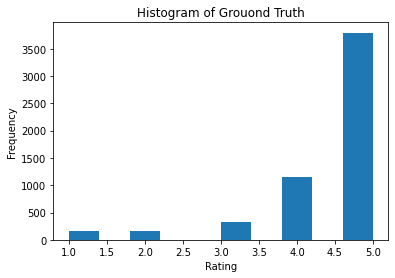

In [0]:
# Plot HIstogram of ground turth
plt.title("Histogram of Grouond Truth")
plt.hist(hotelDf_cleaned['ratingScore'],bins = 10)
plt.xlabel('Rating')
plt.ylabel("Frequency")
plt.show()

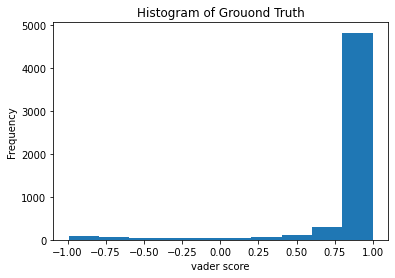

In [0]:
# Plot histograms of Vader sentiment scores
plt.title("Histogram of Grouond Truth")
plt.hist(hotelDf_cleaned['vader'],bins = 10)
plt.xlabel('vader score')
plt.ylabel("Frequency")
plt.show()

It is noted that the rating of 5 and higher varder score have more frequency which means that people tend to spend time writing reviews on positive rating (when they enjoy the experience in that hotel ). Also, it seems that the varder score rating could be indicate which review is positive and which is not as it is simiar trend as the ground truth histogram.

### (b) Show a histogram of the number of reviews per hotel. Do you notice any interesting trends? Are these expected?

In [0]:
Num_reviews = hotelDf_cleaned.groupby(['hotelName']).size().sort_values(ascending = False)

Text(0.5, 1.0, 'Number of Reivews per hotel')

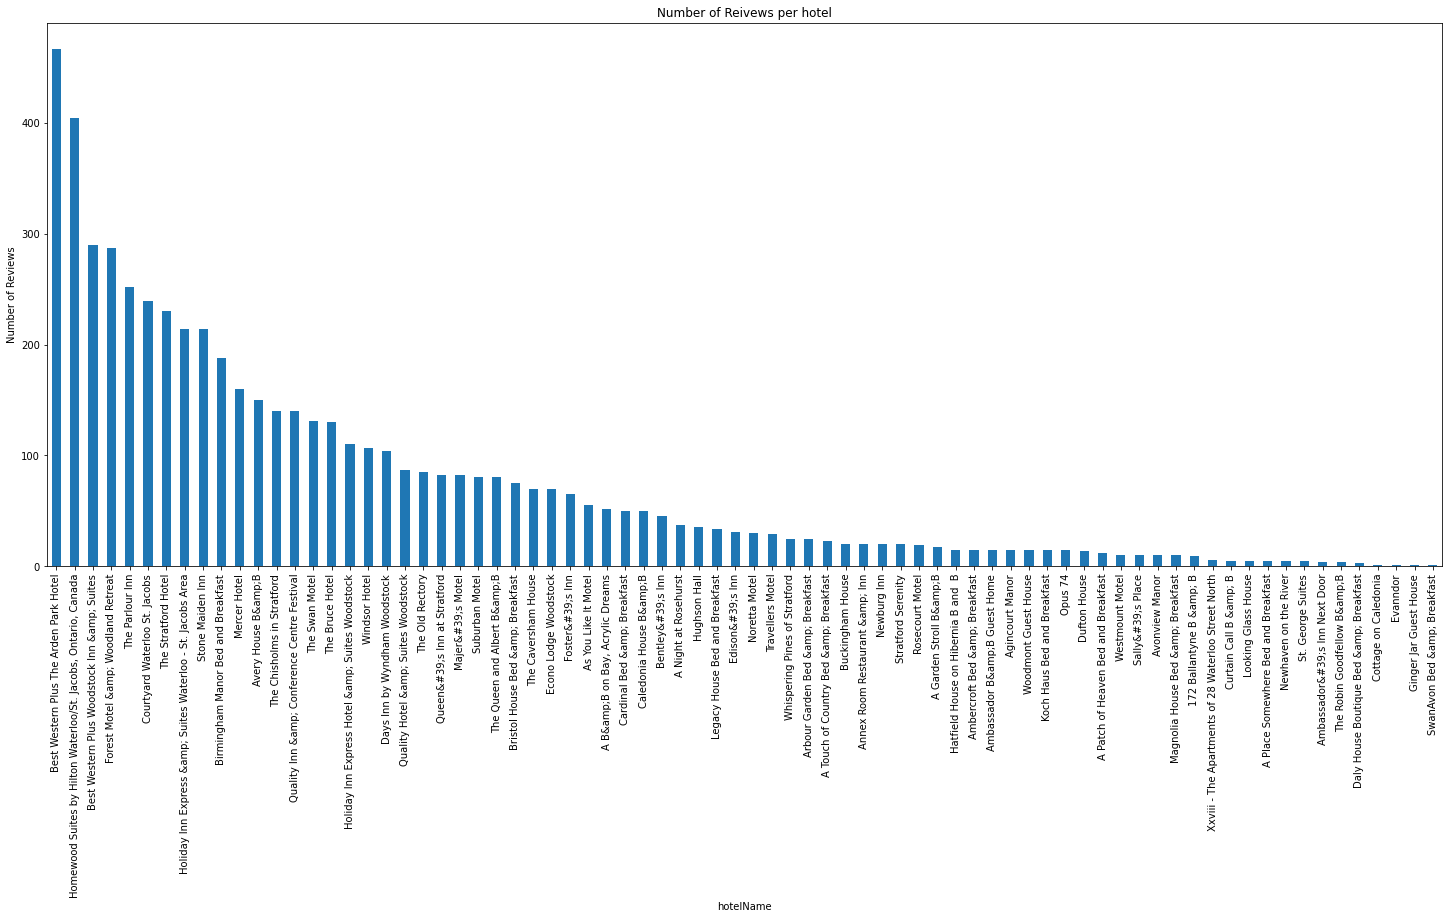

In [0]:
# Plot number of reviews per hotel using pandas.plot
Num_reviews.plot(kind= 'bar',stacked=True,figsize=(25,10))
plt.ylabel("Number of Reviews")
plt.title("Number of Reivews per hotel")

It is noted that most of hotels have less 100 reivews.

##**2. Boxplots**

### (a) In two plots, one for ground truth star rating and one for Vader sentiment, show a plot of 5 side-by-side boxplots of these scores.

In [0]:
hotel_AVGrating.sort_values(by='ratingScore',ascending = False).head()

,hotelName,ratingScore
24,Cottage on Caledonia,5.0
36,Hatfield House on Hibernia B and B,5.0
27,Daly House Boutique Bed &amp; Breakfast,5.0
67,The Robin Goodfellow B&amp;B,5.0
15,Avonview Manor,5.0


In [0]:
hotel_AVG_vader.sort_values(by='vader',ascending = False).head()

,hotelName,vader
35,Ginger Jar Guest House,0.993600
48,Newhaven on the River,0.983460
32,Evanndor,0.976400
27,Daly House Boutique Bed &amp; Breakfast,0.974633
67,The Robin Goodfellow B&amp;B,0.973850


In [0]:
tp5gthotel = hotel_AVGrating.sort_values('ratingScore',ascending=0).head(10)
tp5gthotel

,hotelName,ratingScore
24,Cottage on Caledonia,5.000000
36,Hatfield House on Hibernia B and B,5.000000
27,Daly House Boutique Bed &amp; Breakfast,5.000000
67,The Robin Goodfellow B&amp;B,5.000000
15,Avonview Manor,5.000000
48,Newhaven on the River,5.000000
32,Evanndor,5.000000
64,The Old Rectory,4.988235
19,Birmingham Manor Bed and Breakfast,4.973404
14,Avery House B&amp;B,4.966667


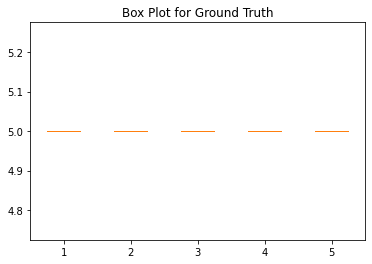

In [0]:
# Gound Trueth
h1 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[1]]['ratingScore']
h2 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[2]]['ratingScore']
h3 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[3]]['ratingScore']
h4 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[4]]['ratingScore']
h5 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[5]]['ratingScore']

data =[h1,h2,h3,h4,h5]
plt.figure()
plt.boxplot(data)
plt.title("Box Plot for Ground Truth")
plt.show()

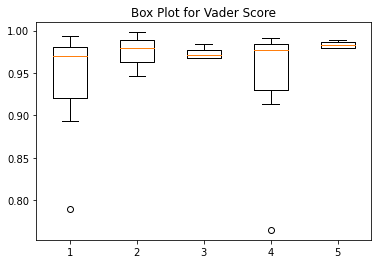

In [0]:
# Vader Score
h1 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[1]]['vader']
h2 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[2]]['vader']
h3 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[3]]['vader']
h4 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[4]]['vader']
h5 = hotelDf_cleaned.loc[hotelDf_cleaned['hotelName'] == tp5gthotel['hotelName'].values[5]]['vader']

data =[h1,h2,h3,h4,h5]
plt.figure()
plt.boxplot(data)
plt.title("Box Plot for Vader Score")
plt.show()

### (b) Report the mean and variance of the ground truth and Vader sentiment scores for the top-5 ranked hotels according to star rating.

In [0]:

top5_hotel_by_GT = hotelDf.groupby('hotelName').mean()[['ratingScore','vader']].sort_values('ratingScore',ascending=0)[1:6].reset_index()
top5_hotel_by_GT['hotelName'].values

array(['Hatfield House on Hibernia B and  B',
       'Daly House Boutique Bed &amp; Breakfast',
       'The Robin Goodfellow B&amp;B', 'Avonview Manor',
       'Newhaven on the River'], dtype=object)

In [0]:
var_true = []
var_vader = []
for i in range(len(top5_hotel_by_GT['hotelName'].values)):
  var_true.append(hotelDf.loc[hotelDf['hotelName'] == top5_hotel_by_GT['hotelName'].values[i]]['ratingScore'].var())
  var_vader.append(hotelDf.loc[hotelDf['hotelName'] == top5_hotel_by_GT['hotelName'].values[i]]['vader'].var())

In [0]:
top5_hotel_by_GT['Variance_ground'] = var_true
top5_hotel_by_GT['Variance_vader'] = var_vader

In [0]:
top5_hotel_by_GT

,hotelName,ratingScore,vader,Variance_ground,Variance_vader
0,Hatfield House on Hibernia B and B,5.0,0.945593,0.0,0.002922
1,Daly House Boutique Bed &amp; Breakfast,5.0,0.974633,0.0,0.000672
2,The Robin Goodfellow B&amp;B,5.0,0.973850,0.0,0.000055
3,Avonview Manor,5.0,0.944990,0.0,0.004756
4,Newhaven on the River,5.0,0.983460,0.0,0.000016


### (c) Which do you find more informative, the boxplots or the mean and variance, or are they equally informative? Why?

Boxplot is more informative. THis is because the boxplot shows the outliers, quartile and median value which help reader to visulize the data.

## **3.Scatterplots and heatmaps**

### (a) Show both a scatterplot and heatmap of ground truth score (star rating) versus Vader sentiment score. Each review is a point on the scatterplot. Do you notice anything interesting? What does this tell you about star ratings vs. Vader sentiment scores? What does this tell you about human ratings and/or Vader sentiment analysis?

Text(0.5, 0, 'Vader Score')

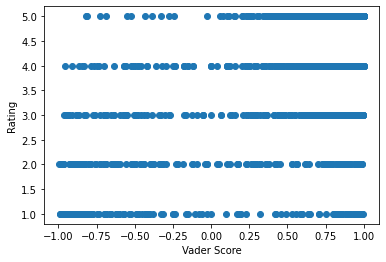

In [0]:
y = hotelDf['ratingScore'].values
x = hotelDf['vader'].values
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

In [0]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Text(0, 0.5, 'Rating')

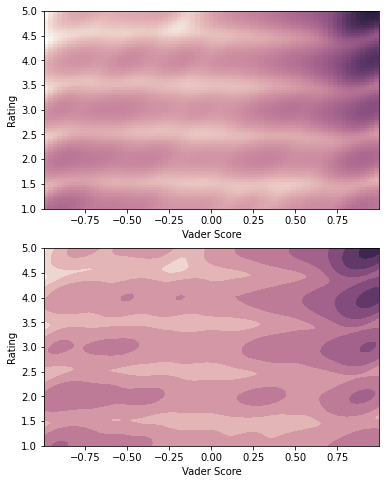

In [0]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

It seems that the vader score and the ground truth rating highly correlated at rating of 4 to 5 because the heat map shows the very strong darkness in this area.

### (b) Show two scatterplots and two heatmaps of the length of reviews versus each of ground truth score and Vader sentiment score. Each review is a point on the scatterplot. Are there any trends?

In [0]:
# Calcate the length for each review
word_length = []
for sentence in hotelDf['reviewColumn']:
  word_length.append(len(sentence.split()))

Text(0, 0.5, 'Rating')

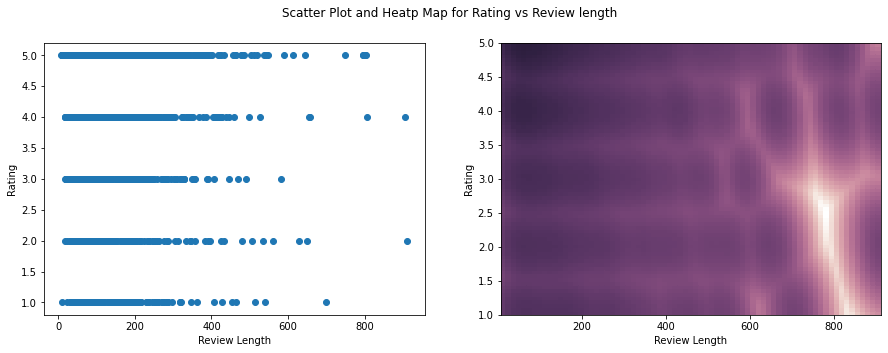

In [0]:
y = hotelDf['ratingScore'].values
x = np.array(word_length)

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

fig,(ax1,ax2)= plt.subplots(1,2,figsize = (15,5))

plt.suptitle("Scatter Plot and Heatp Map for Rating vs Review length")

#Generate the Scatter Plot 
ax1.plot(x, y,"o")
ax1.set_xlabel('Review Length')
ax1.set_ylabel('Rating')

#Generate the Heat Map
ax2.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())
ax2.set_xlabel('Review Length')
ax2.set_ylabel('Rating')


Text(0, 0.5, 'Vader Score')

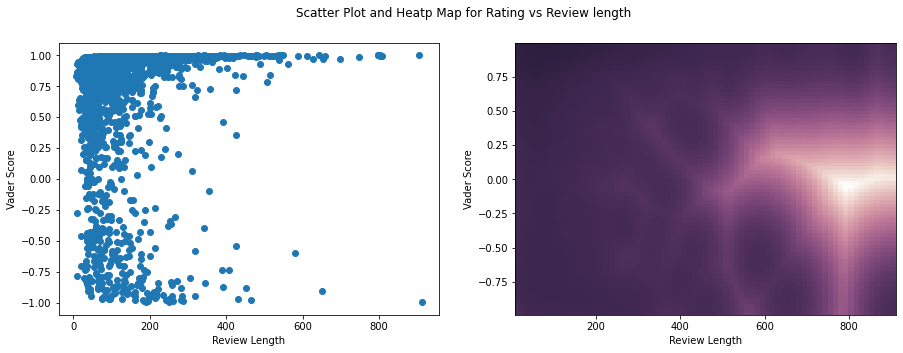

In [0]:
y = hotelDf['vader'].values
x = np.array(word_length)

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

fig,(ax1,ax2)= plt.subplots(1,2,figsize = (15,5))

plt.suptitle("Scatter Plot and Heatp Map for Rating vs Review length")

#Generate the Scatter Plot 
ax1.plot(x, y,"o")
ax1.set_xlabel('Review Length')
ax1.set_ylabel('Vader Score')

#Generate the Heat Map
ax2.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())
ax2.set_xlabel('Review Length')
ax2.set_ylabel('Vader Score')


From the above graphs, both scatter and heatmaps show that the "Perfect" positive review (e.g., top of the graph) and " worest" negative reviews tend to have longer reivews while the nuetral rateing have a relatively shor reviews. Also, the positive reviews look like have abit more words than the negative reviews. It is also worth noting that most revriews have atound 200 words.

### (c) Show two scatterplots of the number of reviews per hotel versus each of average ground truth score and average Vader sentiment score. In this case, each hotel is a single point on the scatterplot. Are there any trends?

Text(0, 0.5, 'Vader Score')

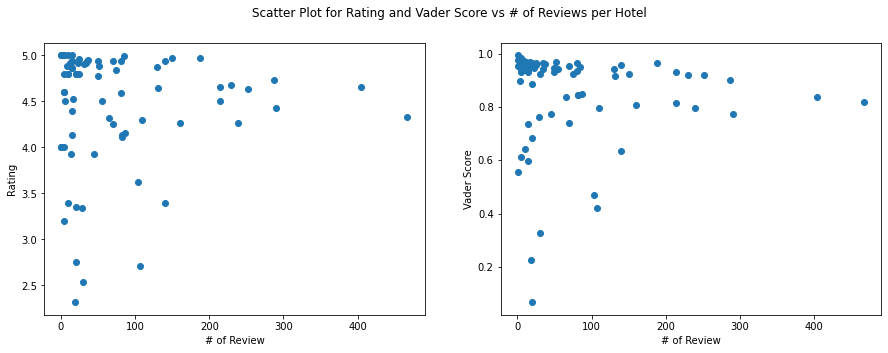

In [0]:
y_rating = hotelDf.groupby('hotelName')['ratingScore'].mean().values
y_vader = hotelDf.groupby('hotelName')['vader'].mean().values
x = hotelDf.groupby('hotelName')['reviewColumn'].count().values

fig,(ax1,ax2)= plt.subplots(1,2,figsize = (15,5))

plt.suptitle("Scatter Plot for Rating and Vader Score vs # of Reviews per Hotel")

#Generate the Scatter Plot for rating
ax1.plot(x, y_rating,"o")
ax1.set_xlabel('# of Review')
ax1.set_ylabel('Rating')

#Generate the Scatter Plot for vader score
ax2.plot(x, y_vader,"o")
ax2.set_xlabel('# of Review')
ax2.set_ylabel('Vader Score')


It shows that:
1. Most hotels have high rating in this small town
2. Most hotels with positive ratings have very small amount of reviews.
3. Most hotels have number of reivews less than 100.